# Compare Probability of Gini Impurity & Shannon Entropy with 2D Plot
# مقایسه احتمال عدم خلوص جینی و انتروپی شنون با نمودار دو بعدی 

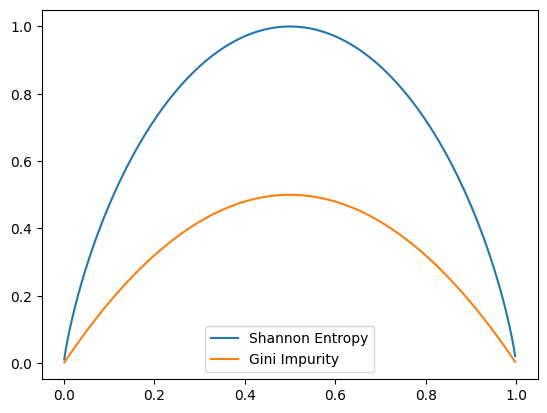

In [6]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
a = np.arange(0.001,0.999,0.001)
se=entropy([a,1-a],base=2)
gi=1-((a**2)+(1-a)**2)
plt.figure()
plt.plot(a,se,label="Shannon Entropy")
plt.plot(a,gi,label="Gini Impurity")
plt.legend()
plt.show()

# Compare Probability of Gini Impurity & Shannon Entropy with 3D Plot
# مقایسه‌ی احتمال عدم خلوص جینی و انتروپی شنون با نمودار سه بعدی

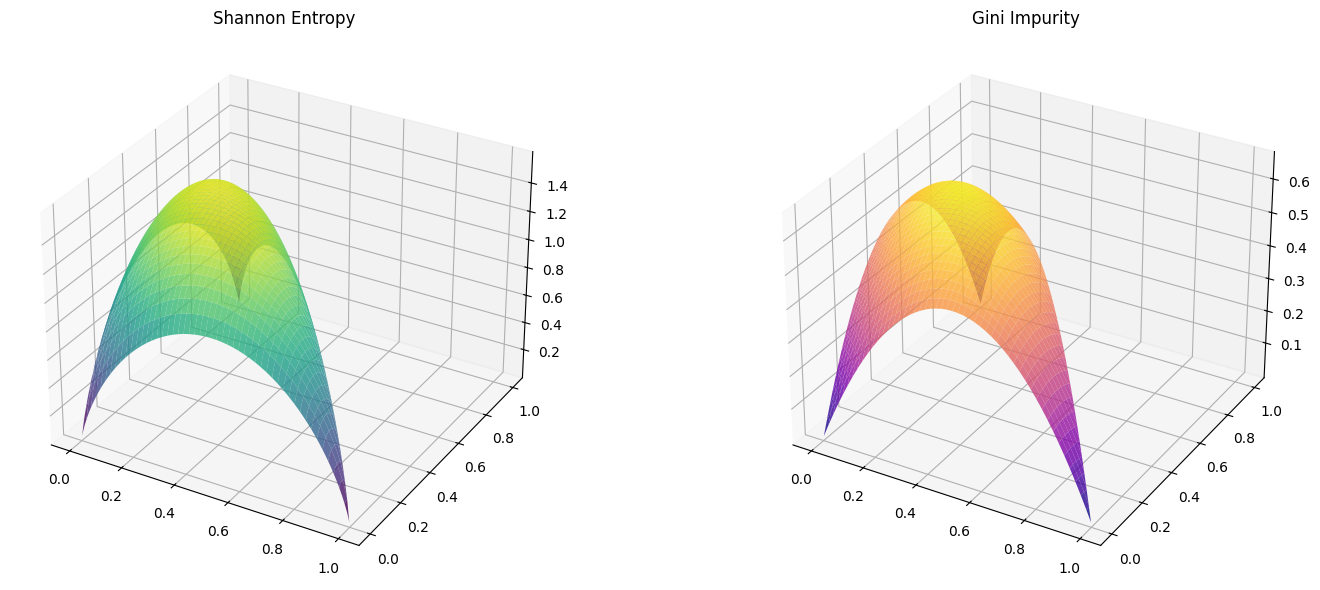

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def shannon_entropy(p):
    return -np.sum(p * np.log2(p))
def gini_impurity(p):
    return 1 - np.sum(p**2)
roo = np.linspace(0.001, 1, 1000)
posht = np.linspace(0.001, 1, 1000)
roo, posht = np.meshgrid(roo, posht)
labe = 1 - (roo + posht)
mask = (labe > 0) & (labe < 1)
entropy_values = np.zeros_like(roo)
gini_values = np.zeros_like(roo)
for i in range(1000):
    for j in range(1000):
        if mask[i, j]:
            p = np.array([roo[i, j], posht[i, j], labe[i, j]])
            entropy_values[i, j] = shannon_entropy(p)
            gini_values[i, j] = gini_impurity(p)
        else:
            entropy_values[i, j] = np.nan
            gini_values[i, j] = np.nan
fig = plt.figure(figsize=(16, 6))
entropy = fig.add_subplot(121,projection='3d')
entropy.plot_surface(roo, posht, entropy_values, cmap='viridis', linewidth=0, antialiased=True, alpha=0.8)
entropy.set_title("Shannon Entropy")
gini = fig.add_subplot(122, projection='3d')
gini.plot_surface(roo, posht, gini_values, cmap='plasma', linewidth=0, antialiased=True, alpha=0.8)
gini.set_title("Gini Impurity")
plt.tight_layout()
plt.show()

# Diffrent 2 Classifier Decision Trees
# درخت تصمیم های 2 کلاسه‌ی متفاوت

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import os
classifier = int(input('Input Num : '))
folder = fr"C:\Users\USER\Desktop\{classifier} input diffrent trees"
os.makedirs(folder, exist_ok=True)
rather = input("Choose your show type , num or plot : ")
ghad = list(x for x in range(1,classifier+1,1))
ghad=np.array(ghad).reshape(-1,1)
makan = []
ans = []
z=0
for i in range(1,2**(classifier)):
    makan.append(list(int(x) for x in bin(i)[2:].rjust(classifier,'0')))
if rather=="num":
    for i in range(2**(classifier)-1):
        modelGini=DecisionTreeClassifier(max_depth=None, criterion='gini')
        modelGini.fit(ghad,makan[i])
        modelEntropy=DecisionTreeClassifier(max_depth=None, criterion='entropy')
        modelEntropy.fit(ghad,makan[i])
        if modelGini.tree_.threshold[0]!=modelEntropy.tree_.threshold[0]:
            z+=1
            ans.append(bin(i+1)[2:].rjust(classifier,"0"))
            plt.savefig(os.path.join(folder, f'{bin(i+1)[2:].rjust(classifier,"0")}.jpg'), dpi=300, bbox_inches='tight')
            plt.figure(figsize=(16, 8))
            plt.subplot(1, 2, 1)
            plot_tree(modelGini, filled=True)
            plt.title(f'Gini {bin(i+1)[2:].rjust(classifier,"0")}')
            plt.subplot(1, 2, 2)
            plot_tree(modelEntropy, filled=True)
            plt.title(f'Entropy {bin(i+1)[2:].rjust(classifier,"0")}')
            plt.tight_layout()
            plt.savefig(os.path.join(folder, f'{bin(i+1)[2:].rjust(classifier,"0")}.jpg'), dpi=300, bbox_inches='tight')
        plt.close()
else :
    for i in range(2**(classifier)-1):
        plt.subplot(1,2,1)
        modelGini=DecisionTreeClassifier(max_depth=None, criterion='gini')
        modelGini.fit(ghad,makan[i])
        modelEntropy=DecisionTreeClassifier(max_depth=None, criterion='entropy')
        modelEntropy.fit(ghad,makan[i])
        if modelGini.tree_.threshold[0]!=modelEntropy.tree_.threshold[0]:
            z+=1
            ans.append(bin(i+1)[2:].rjust(classifier,"0"))
            plot_tree(modelGini,filled=True)
            plt.title(f'Gini {bin(i+1)[2:].rjust(classifier,"0")}')
            plt.subplot(1,2,2)
            plot_tree(modelEntropy,filled=True)
            plt.title(f'Entropy {bin(i+1)[2:].rjust(classifier,"0")}')
            plt.gcf().canvas.manager.set_window_title('Gini')
            plt.savefig(os.path.join(folder, f'{bin(i+1)[2:].rjust(classifier,"0")}.jpg'), dpi=300, bbox_inches='tight')
            plt.tight_layout()
            plt.show()
        plt.close()
print("Num of unequal trees : ",z)
for i in ans:
    print(i,end=",")


>**Num of *7 Bit* unequal trees :  6**
>
>0100010 , 0100110 , 0110010 , 1001101 , 1011001 , 1011101
>
>
>**Num of *8 Bit* unequal trees :  20**
>
>00001001 , 00100101 , 00100110 , 00101001 , 00110001 , 01011011 , 01100100 , 01101011 , 01101111 , 01110011 , 10001100 , 10010000 , 10010100 , 10011011 , 10100100 , 11001110 , 11010110 , 11011001 , 11011010 , 11110110
>
>
>**Num of *9 Bit* unequal trees :  30**
>
>000001001 , 001000010 , 001000101 , 010000100 , 010000101 , 010010110 , 010011010 , 010110010 , 010110111 , 011000001 , 011001000 , 011010010 , 011010111 , 011011111 , 011100111 , 100011000 , 100100000 , 100101000 , 100101101 , 100110111 , 100111110 , 101001000 , 101001101 , 101100101 , 101101001 , 101111010 , 101111011 , 110111010 , 110111101 , 111110110

# GI & SE Selections to Split in each Data
# انتخاب های عدم خلوص جینی و انتروپی شنون برای تقسیم در هر داده

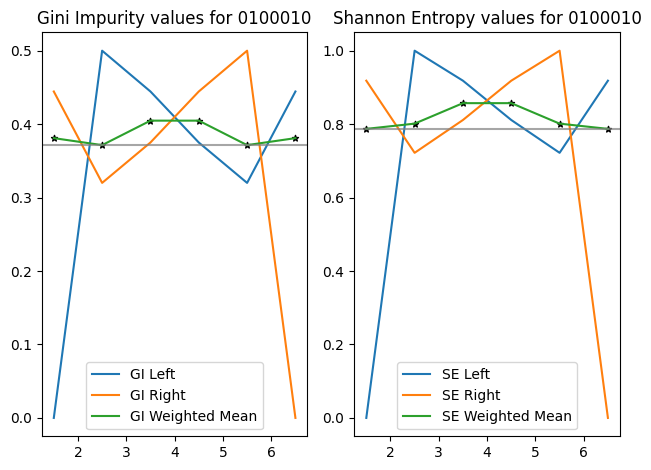

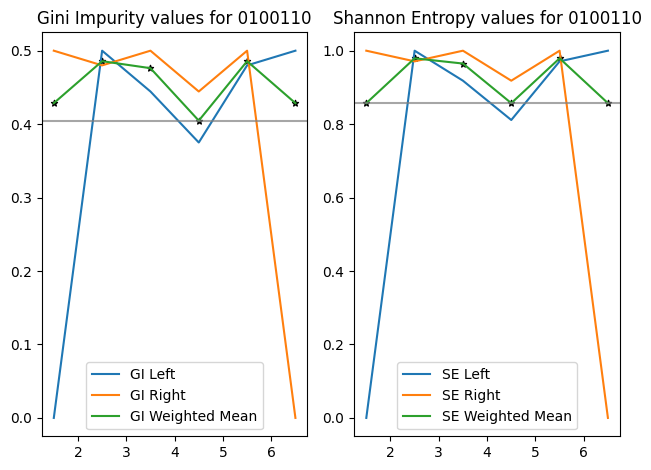

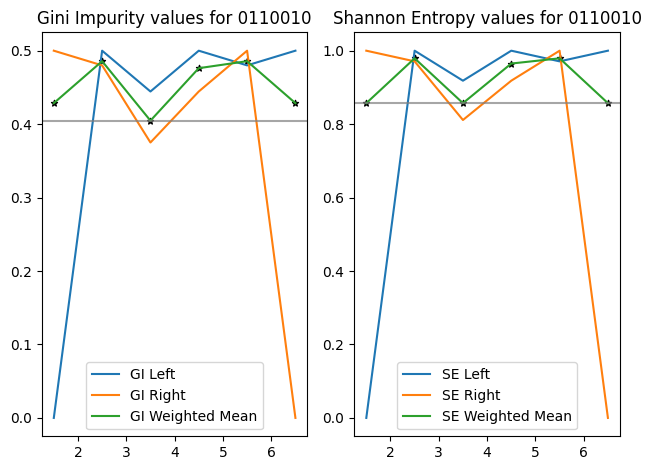

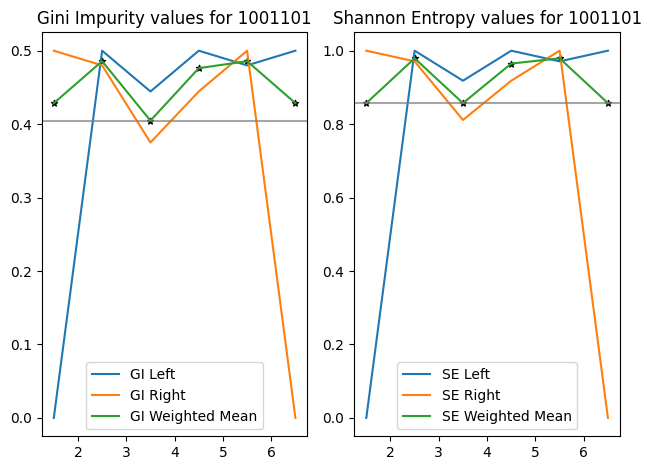

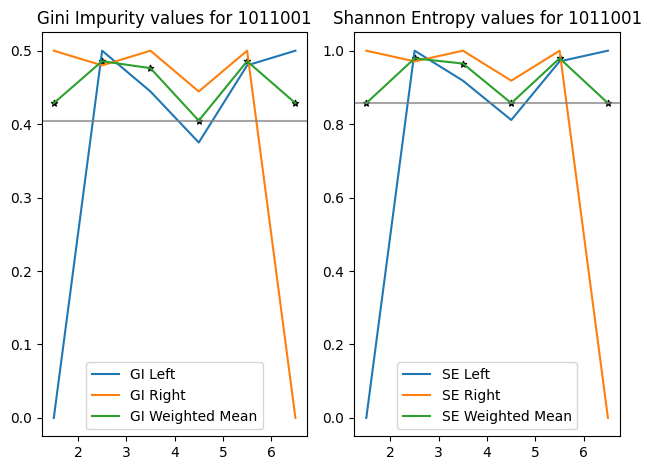

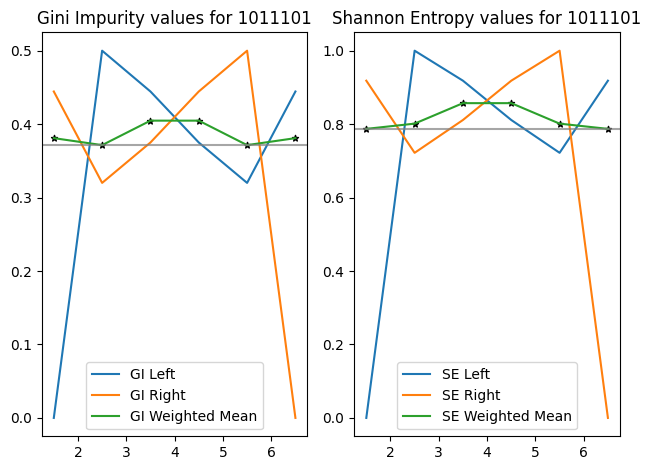

In [3]:
import numpy as np
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
classifier = int(input('Input Num : '))
ghad = list(x for x in range(1,classifier+1,1))
ghad=np.array(ghad).reshape(-1,1)
makan = []
for y in range(1,2**(classifier)):
    makan.append(list(int(x) for x in bin(y)[2:].rjust(classifier,'0')))
for j in range(2**(classifier)-1):
    modelGini=DecisionTreeClassifier(max_depth=None, criterion='gini')
    modelGini.fit(ghad,makan[j])
    modelEntropy=DecisionTreeClassifier(max_depth=None, criterion='entropy')
    modelEntropy.fit(ghad,makan[j])
    if modelGini.tree_.threshold[0]!=modelEntropy.tree_.threshold[0]:
        j+=1
        n= [int(x) for x in bin(j)[2:].rjust(classifier,'0')]
        a = np.arange(1.5,len(n)+0.5,1)
        left=[]
        right=[]
        for i in a:
            leftvalues = n[:int(i-0.5)];llv=len(leftvalues)
            rightvalues = n[int(i-0.5):];lrv=len(rightvalues)
            l0=leftvalues.count(0);r0=rightvalues.count(0);l1=leftvalues.count(1);r1=rightvalues.count(1)
            left.append([l0/llv,l1/llv])
            right.append([r0/lrv,r1/lrv])
        sel = np.array([entropy(x, base=2) for x in left])
        ser = np.array([entropy(x, base=2) for x in right])
        sem = (sel*np.arange(1,classifier)+ser*np.arange(classifier-1,0,-1))/classifier
        gil = np.array([1-((x[0]**2)+x[1]**2) for x in left])
        gir = np.array([1-((x[0]**2)+x[1]**2) for x in right])
        gim = (gil*np.arange(1,classifier)+gir*np.arange(classifier-1,0,-1))/classifier
        plt.figure()
        plt.subplot(1,2,1)
        plt.plot(a,gil,label='GI Left')
        plt.plot(a,gir,label='GI Right')
        plt.plot(a,gim,label='GI Weighted Mean')
        plt.title(f"Gini Impurity values for {bin(j)[2:].rjust(classifier,'0')}")
        for i in range(classifier-1):
            plt.scatter(a[i],gim[i],marker='*',c="black",s=20)
        plt.axhline(min(gim), color='gray',alpha=0.7)
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(a,sel,label='SE Left')
        plt.plot(a,ser,label='SE Right')
        plt.plot(a,sem,label='SE Weighted Mean')
        plt.title(f"Shannon Entropy values for {bin(j)[2:].rjust(classifier,'0')}")
        for i in range(classifier-1):
            plt.scatter(a[i],sem[i],marker='*',c="black",s=20)
        plt.axhline(min(sem), color='gray',alpha=0.7)
        plt.gcf().canvas.manager.set_window_title(bin(j)[2:].rjust(classifier,'0'))
        plt.legend()
        plt.tight_layout()
        plt.show()

# Compare Kullback–Leibler Divergence & Shannon Entropy
# مقایسه واگرایی کولبک لیبلر و انتروپی شنون

In [7]:
from numpy import log
from numpy import array
import scipy.stats as sss
x1= [2,3,1,7,4,4,5,75,3,66,74,423];x2=[7,577,32,46,7,74,423,36,454,2556,4,6] #datas are random
anskl = 0
ansse = []
if len(x1)!=len(x2):
    print("ERROR! x1 & x2 must have same length.")
else:
    for i in range(len(x1)):
        anskl+=x1[i]/sum(x1)*log((x1[i]/sum(x1))/(x2[i]/sum(x2)))
        ansse.append(-((x1[i]/(x1[i]+x2[i]))*log(x1[i]/(x1[i]+x2[i]))+(x2[i]/(x1[i]+x2[i]))*log(x2[i]/(x1[i]+x2[i]))))
    print("KL Divergence by Manual Calculation : ",anskl,end="\n\n")
    print("KL Divergence by Entropy Function : ",sss.entropy(x1,x2),end="\n\n")
    print("Shannon Entropy by Manual Calculation : ",array(ansse).astype(float),end="\n\n")
    print("Shannon Entropy by Entropy Function : ",sss.entropy([x1,x2]),end="\n\n")

KL Divergence by Manual Calculation :  4.4594709547005404

KL Divergence by Entropy Function :  4.4594709547005404

Shannon Entropy by Manual Calculation :  [0.5297062  0.03238875 0.13579396 0.39031313 0.65548177 0.202273
 0.06359604 0.63008614 0.03953686 0.117535   0.202273   0.0736038 ]

Shannon Entropy by Entropy Function :  [0.5297062  0.03238875 0.13579396 0.39031313 0.65548177 0.202273
 0.06359604 0.63008614 0.03953686 0.117535   0.202273   0.0736038 ]



>In mathematical statistics, the Kullback-Leibler Divergence criterion is a method for determining the >degree of difference between two probability distributions. Among the applications of this criterion are >the measurement of randomness in time series and relative disorder (Shannon Entropy) in information >systems. In this code, we were able to obtain the Kullback–Leibler divergence value and Shannon Entropy >values of the two lists by manual calculations. Then, we repeated this task using the entropy command of >the scipy.stats library without manual calculations and using the built-in functions.

>در آمار ریاضی، معیار واگرایی کولبک-لیبلر روشی برای تعیین درجه اختلاف بین دو توزیع احتمال است. از جمله کاربردهای این معیار می‌توان به اندازه‌گیری تصادفی بودن در سری‌های زمانی و بی‌نظمی نسبی (آنتروپی شانون) در سیستم‌های اطلاعاتی اشاره کرد. در این کد، ما توانستیم مقدار واگرایی کولبک-لیبلر و مقادیر آنتروپی شانون دو لیست را با محاسبات دستی به دست آوریم. سپس، این کار را با استفاده از دستور entropy کتابخانه scipy.stats بدون محاسبات دستی و با استفاده از توابع داخلی تکرار کردیم

# Authors   
# مولفان


>**Researcher :  Mahan Tabatabaei Nezhad**
>
>**Teacher : Mr Pooya Pakarian**

>پژوهشگر : ماهان طباطبایی نژاد
>
>معلم راهنما : جناب آقای پویا پاکاریان